<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy
import scipy.stats as st

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


Para poder hacer un analisis del salario mensual NETO percibido, vamos a agrupar la variable ***profile_gender*** para los distintos generos considerados en la encuesta (Hombre, Mujer y Otros) 

In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

Procedimos a realizar un boxplot para analizar la existencia de outliers, o datos atípicos que pueden modificar el resultado del estudio.

Text(0, 0.5, 'Genero')

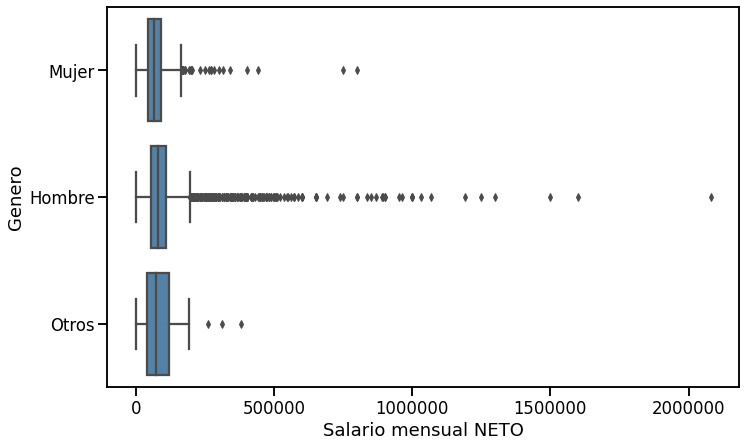

In [6]:
#Boxplot grupos con OUTLIERS
plt.figure(figsize=(7*(1+np.sqrt(5))/2, 7))
seaborn.boxplot(data = df, x='salary_monthly_NETO', y= 'profile_gender', color = 'steelblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Salario mensual NETO')
plt.ylabel('Genero')

La variable ***salary_monthly_NETO*** presenta outliers para los distintos grupos. Como vamos a estar comparando las medias, realizamos un recorte para que estos valores atipicos no afecten tanto al centro de masa de las respectivas subpoblaciones a considerar.

Text(0, 0.5, 'Genero')

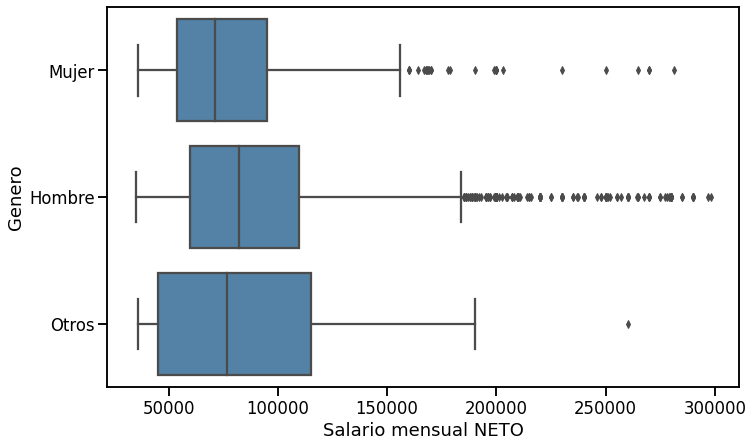

In [7]:
#Se eliminan los Outliers de la base original
df_woo = df[ (df.salary_monthly_NETO > df.salary_monthly_NETO.quantile(0.1)) \
                & (df.salary_monthly_NETO < df.salary_monthly_NETO.quantile(0.97))]

#Boxplot grupos sin OUTLIERS
plt.figure(figsize=(7*(1+np.sqrt(5))/2, 7))
seaborn.boxplot(data = df_woo, x='salary_monthly_NETO', y= 'profile_gender', color = 'steelblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Salario mensual NETO')
plt.ylabel('Genero')

In [8]:
df_woo[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                       \
                             count          mean           std      min   
profile_gender                                                            
Hombre                      4317.0  91238.189956  44410.676207  35100.0   
Mujer                        769.0  79321.556463  36136.964616  36000.0   
Otros                         25.0  89300.000000  56201.586573  35900.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          60000.0  82000.0  109720.0  298000.0  
Mujer           54000.0  71000.0   95000.0  281250.0  
Otros           45000.0  76800.0  115000.0  260000.0

Dado que las subpoblaciones Otros es considerablemente mas chica que la subpoblacion Hombres (grupo A) y subpoblacion Mujeres (grupo B) las descartamos.

In [9]:
is_man = df_woo.profile_gender == 'Hombre'
is_woman = df_woo.profile_gender == 'Mujer'
groupA = df_woo[is_man].salary_monthly_NETO # Hombres
groupB = df_woo[is_woman].salary_monthly_NETO # Mujeres

In [10]:
print(f"HOMBRES:\n {groupA.describe().round(2)} \n")
print(f"MUJERES:\n {groupB.describe().round(2)} \n")

HOMBRES:
 count      4317.00
mean      91238.19
std       44410.68
min       35100.00
25%       60000.00
50%       82000.00
75%      109720.00
max      298000.00
Name: salary_monthly_NETO, dtype: float64 

MUJERES:
 count       769.00
mean      79321.56
std       36136.96
min       36000.00
25%       54000.00
50%       71000.00
75%       95000.00
max      281250.00
Name: salary_monthly_NETO, dtype: float64 



## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

###**Estimación puntual**

Para  hacer una estimación puntual de la diferencia de las medias de ambas subpoblaciones, vamos a considerar los siguientes **estimadores**

$ \hat{\theta_A} = \bar{X_A} $

$ \hat{\theta_B} = \bar{X_B} $

$ \hat{\theta} = \bar{X_A} - \bar{X_B} $

Donde:

$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}{x_i}$

Es la media muestral.

In [11]:
print(f"GRUPO A - HOMBRES\nMedia: {round(groupA.mean(),2)} - σ_a.: {round(groupA.std(),2)} - Var: {round(groupA.std()**2,2)} - Size: {groupA.size}\n")
print(f"GRUPO B - MUJERES\nMedia: {round(groupB.mean(),2)} - σ_b: {round(groupB.std(),2)} - Var: {round(groupB.std()**2,2)} - Size: {groupB.size}\n")
meanDifAB = groupA.mean()-groupB.mean()
print(f"Diferencia de medias\n  groupA - groupB: {round(meanDifAB,2)}\n")
print(f"La ESTIMACION PUNTUAL de la DIFERENCIA DE LA MEDIA de salarios mensuales NETOS entre ambas subpoblaciones es de:\
        \n {round(meanDifAB,2)} ARS$")

GRUPO A - HOMBRES
Media: 91238.19 - σ_a.: 44410.68 - Var: 1972308161.2 - Size: 4317

GRUPO B - MUJERES
Media: 79321.56 - σ_b: 36136.96 - Var: 1305880211.68 - Size: 769

Diferencia de medias
  groupA - groupB: 11916.63

La ESTIMACION PUNTUAL de la DIFERENCIA DE LA MEDIA de salarios mensuales NETOS entre ambas subpoblaciones es de:        
 11916.63 ARS$


###**Intervalo de confianza**

Para poder calcular el intervalo de confianza necesitamos un estadistico. Para decidir cuál usaremos es necesario identificar dos cosas:
- En primer lugar si la distribución de las subpoblaciones es normal o no.
- En segundo lugar si las subpoblaciones tienen la misma varianza.

Una primera aproximación para identificar si las subpoblaciones tienen distribución normal es graficar las distribuciones de los datos de las mismas.

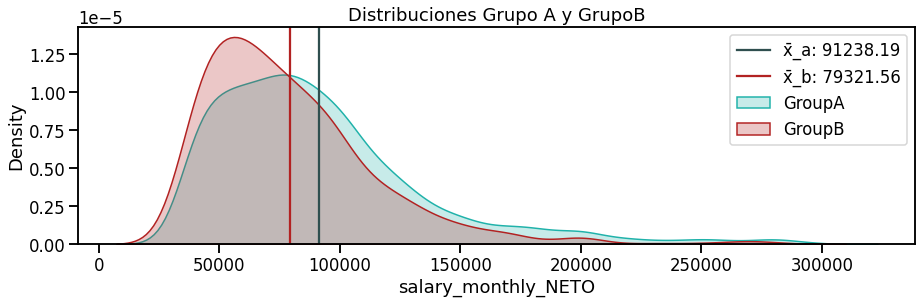

In [12]:
#Grafico distribuciones grupo A y grupo B
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,4))
#ax.hist(data, bins=30, density=True, color='#3182bd', alpha=0.5)
seaborn.kdeplot(groupA, shade=True, color='lightseagreen', label="GroupA")
seaborn.kdeplot(groupB, shade=True, color='firebrick', label="GroupB")
ax.axvline(x=groupA.mean(), color='darkslategray', label=f'x̄_a: {round(groupA.mean(),2)}')
ax.axvline(x=groupB.mean(), color='firebrick', label=f'x̄_b: {round(groupB.mean(),2)}')
#ax.axvline(x=groupA.mean()- groupB.mean(), color='darkorange', label=f'x̄_1-x̄_2: {round(groupA.mean()-groupB.mean(),2)}')
ax.set_title('Distribuciones Grupo A y GrupoB')
ax.legend()

Podemos intuir graficamente, por las colas, que ninguna de las subpoblaciones vaya a seguir una distribucion normal. De todas formas para asegurarnos realizaremos un test de Shapiro-Wilk para verificar normalidad.

Asumimos un nivel de significancia $\alpha = 0,05 $, que de aquí en adelante se empleará en todos los test de hipotesis a realizar y para los calculos de intervalos de confianza.

In [13]:
#Nivel de significancia del test
alpha = 0.05
#Criterio de decision
def decision_citeria(p,alpha):
  if(p > alpha):
    return "No se puede rechazar hipotesis nula"
  elif(p < alpha):
    return "Se rechaza hipotesis nula"
  else:
    return "El test no decide"

Realizando el test bajo hipotesis nula suponemos las siguientes hipotesis nulas:

- $H_{0A} :$ El salario mensual NETO de los HOMBRES sigue una distribucion normal
- $H_{0B} :$ El salario mensual NETO de las MUJERES sigue una distribucion normal

(En ambos casos la hipotesis alternativa es que el salario mensual NETO no siga una distribucion normal)


In [14]:
#Estadistico Shapiro-Wilk para verificar normalidad de las subpoblaciones
w_shap_a, p_shap_a = st.shapiro(groupA)
w_shap_b, p_shap_b = st.shapiro(groupB)
print(f"GroupA(HOMBRES):\n - W = {w_shap_a} \n - p = {p_shap_a}\n - {decision_citeria(p_shap_a,alpha)} \n\
        \nGroupB(MUJERES):\n - W = {w_shap_b} \n - p = {p_shap_b}\n - {decision_citeria(p_shap_b,alpha)}" )

GroupA(HOMBRES):
 - W = 0.8716506361961365 
 - p = 0.0
 - Se rechaza hipotesis nula 
        
GroupB(MUJERES):
 - W = 0.8647454380989075 
 - p = 3.3203448858401516e-25
 - Se rechaza hipotesis nula


A partir del test podemos deducir que ninguna de las subpoblaciones sigue una distribucion normal. Se observa de los ***p-valores*** obtenidos que el rechazo de la hipotesis nula es mucho mas significativo para la subpoblacion de **MUJERES** que para la subpoblacion de **HOMBRES**

Dado que las distribuciones no son normales, buscaremos un test de igualdad de varianzas generalizado para muestras que sigan cualquier distribucion. En este orden aplicamos el **Test de Levene**, asumiendo nuevamente un $\alpha = 0.05$. La Hipotesis nula queda definida en este caso como:
- $H_0$: Las varianzas del Grupo A (HOMBRES) y del Grupo B (MUJERES) son iguales
- $H_1$: Las varianzas del Grupo A (HOMBRES) y del Grupo B (MUJERES) son diferentes

In [15]:
#Prueba igualdad de varianzas
w_lev, p_lev = st.levene(groupA,groupB)
print(f"Prueba igualdad de Varianzas Grupo A y Grupo B:\n - W = {w_lev} \n - p = {p_lev}\n - {decision_citeria(p_lev,alpha)}")

Prueba igualdad de Varianzas Grupo A y Grupo B:
 - W = 19.976007832164598 
 - p = 8.012402789892865e-06
 - Se rechaza hipotesis nula


Al realizar el test de Levene, las varianzas del grupo A y del grupo B son diferentes. Considerando esto, podemos determinar que el estadístico a emplear para el cálculo de los intervalos de confianza es el de Welch o t para varianzas desiguales.

***Nota al margen***

_Se podría haber empleado el estadistico de Welch directamente, dado que el mismo tiende a un t cuando las varianzas son iguales, pero se hizo el desarrollo para poner en practica la teoría y jugar un poco con los test de hipótesis :)_

Entonces, procederemos a armar el **I**ntervalo de **C**onfianza para diferencias de medias $\mu_a - \mu_b$, empleando el Método de Welch (usa t de student con k.. grados de libertad)

$ (\bar{X_1} - \bar{X_2}) - t_{{\alpha/2},k} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} < \mu_1 - \mu_2 < (\bar{X_1} - \bar{X_2}) + t_{{\alpha/2},k} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$

$ LI< \mu_1 - \mu_2 < LS$

$k_{grados de libertad} = \frac{(\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2})^2}{\frac{(\frac{\sigma_1^2}{n_1})^2}{n_1 - 1}+\frac{(\frac{\sigma_2^2}{n_2})^2}{n_2 - 1}}$

Media muestral A: 91238.19 - σ_1: 44410.68 - Var: 1972308161.2 - Size: 4317
Media muestral B: 79321.56 - σ_2: 44410.68 - Var: 1305880211.68 - Size: 769
valor stdt = 1.65 - k(grados de libertad) = 1221.11 
LI: 9500.16 , LS:14333.11
Long intervalo: 4832.96


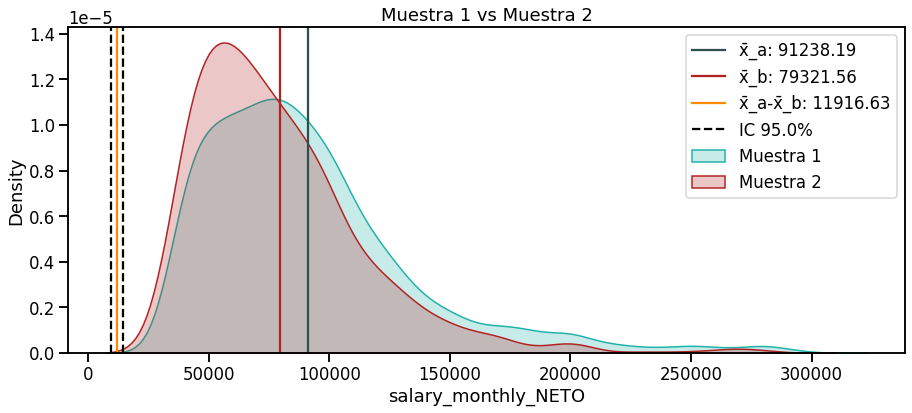

In [16]:
def get_k_df(std1,std2,n1,n2):
  k= ((std1**2/n1 + std2**2/n2)**2) / ((((std1**2/n1)**2)/(n1-1)) + (((std2**2/n2)**2)/(n2-1)))
  return k

def get_intervalos_longitud_tstudent(alpha,samples_1,samples_2,n1,n2):
  data1 = samples_1.sample(n1, replace=False) # muestra de tamaño n
  data2 = samples_2.sample(n2, replace=False) # muestra de tamaño n
  n1 = data1.size
  n2 = data2.size
  std_1 = data1.std()
  std_2 = data2.std()
  media_1 = data1.mean()
  media_2 = data2.mean()
  k = get_k_df(std_1,std_2,n1,n2)
  print(f"Media muestral A: {round(media_1,2)} - σ_1: {round(std_1,2)} - Var: {round(std_1**2,2)} - Size: {n1}")
  print(f"Media muestral B: {round(media_2,2)} - σ_2: {round(std_1,2)} - Var: {round(std_2**2,2)} - Size: {n2}")
  t_std = -scipy.stats.t.ppf(q = alpha, df=k)
  print(f"valor stdt = {round(t_std,2)} - k(grados de libertad) = {round(k,2)} ")
  estadistico_liminf = (media_1-media_2) - t_std*np.sqrt((std_1**2/n1)+(std_2**2/n2))
  estadistico_limsup = (media_1-media_2) + t_std*np.sqrt((std_1**2/n1)+(std_2**2/n2))
  print(f"LI: {round(estadistico_liminf,2)} , LS:{round(estadistico_limsup,2)}")
  long_intervalo = estadistico_limsup - estadistico_liminf
  print(f"Long intervalo: {round(long_intervalo,2)}")
  return data1,data2,estadistico_liminf,estadistico_limsup

def hist_conf_plot(data_1,data_2,LI,LS,alpha):
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,6))
  #ax.hist(data, bins=30, density=True, color='#3182bd', alpha=0.5)
  seaborn.kdeplot(data_1, shade=True, color='lightseagreen', label="Muestra 1")
  seaborn.kdeplot(data_2, shade=True, color='firebrick', label="Muestra 2")
  ax.axvline(x=data_1.mean(), color='darkslategray', label=f'x̄_a: {round(data_1.mean(),2)}')
  ax.axvline(x=data_2.mean(), color='firebrick', label=f'x̄_b: {round(data_2.mean(),2)}')
  ax.axvline(x=data_1.mean()- data_2.mean(), color='darkorange', label=f'x̄_a-x̄_b: {round(data_1.mean()-data_2.mean(),2)}')
  ax.axvline(x=LI, color='black', linestyle='--', label=f'IC {(1-alpha)*100}%')
  ax.axvline(x=LS, color='black', linestyle='--')
  ax.set_title('Muestra 1 vs Muestra 2')
  ax.legend()
  #ax.set_xlabel('media')
  #ax.set_ylabel('densidad')
  #ax.legend()

n1=groupA.size
n2=groupB.size
groupA,groupB,LI,LS = get_intervalos_longitud_tstudent(alpha,groupA,groupB,n1,n2)
hist_conf_plot(groupA,groupB,LI,LS,alpha)

¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Ambos trabajan buscando determinar la diferencia de las medias, por lo tanto emplean el mismo estadistico.

## Ejercicio 2: Test de hipótesis


### 2.1 Formalización
Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

* $H_0:$ La media del salario mensual neto del grupo $A$ es **igual** a la media salario mensual neto  del grupo $B$ 

* $H_1:$ La media del salario mensual neto del grupo $A$ es **diferente** a la media salario mensual neto del grupo $B$ 

|   **$H_0$**   |    **Rechazo**    |     **Acepto**    |
|:-------------:|:-----------------:|:-----------------:|
| **Verdadero** |      Error I ($E1$)      | Decision Correcta | 
|   **Falso**   | Decision Correcta |      Error 2 ($E2$)      | 


**Nivel de Significancia**

$P(E1) = P(Rechazo H_0 | H_0 = True) = \alpha : \hspace{0.5cm} $ Probabilidad de rechazar que las medias del Grupo A y del Grupo B sean iguales cuando estas verifiquen igualdad.

Definimos el nivel de significancia $\alpha$, en otras palabras, el margen de error de tipo I que estoy dispuesto a aceptar. En este caso empleamos nuevamente

$\alpha = 0.05$


**Estadístico**

Como hay que verificar la diferencia de medias podemos considerar lo analizado anteriormente para el cálculo del intervalo de confianza empleando nuevamente el test de Welch. Donde nos queda:

$ T = \frac{\bar{X}_A - \bar{X_B}}{\sqrt{\frac{S_A}{n_A}+\frac{S_B}{n_B}}} \hspace{0.25cm} $ : Estadistico de contraste

$d.f. = \frac{(\frac{S_A^2}{n_A}+\frac{S_B^2}{n_B})^2}{(\frac{S_A^2/n_A}{n_A-1}+\frac{S_B^2/n_B}{n_B-1})^2} \hspace{0.25cm} $ : Grados de libertad







**Regla de decision**

Considerando que mediante el estadístico ***T*** y el ajuste de los grados de libertad ***d.f.*** obtendremos un ***p-valor***, el criterio de decisión queda:

$p-valor < alpha ⇒ $ Rechazo $H_0$

$p-valor > alpha ⇒ $ No se puede rechazar $H_0$

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Calculando del p-valor


In [17]:
#Prueba igualdad de medias
t_welch, p_welch = st.ttest_ind(groupA, groupB, equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B:\n - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}")

Prueba igualdad de Medias Grupo A y Grupo B:
 - T = 8.117598110271688 
 - p = 1.1513756388194103e-15
 - Se rechaza hipotesis nula


Se puede decir que se rechaza con bastante seguridad la hipotesis nula. En otras palabras, las medias del grupo A y del grupo B van a ser distintas a nivel poblacional con mucha seguridad.

Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Para responder a esta pregunta, lo mejor va a ser jugar con las muestras que se vayan tomando, para esto consideramos:

In [18]:
#Conocemos a priori que nA > nB
nA = groupA.count() # cantidad de Hombres
nB = groupB.count() # cantidad de Otros Generos

#Consideramos como afecta la cantidad de datos
#Quedaria mas lindo con un for-loop
t_welch, p_welch = st.ttest_ind(groupA.sample(100, replace=False), groupB.sample(100, replace=False), equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (100 datos en ambas muestras):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(250, replace=False), groupB.sample(250, replace=False), equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (250 datos en ambas muestras):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(500, replace=False), groupB.sample(500, replace=False), equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (500 datos en ambas muestras):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(nB, replace=False), groupB, equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (nB datos en ambas muestras):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")



Prueba igualdad de Medias Grupo A y Grupo B (100 datos en ambas muestras):
 - T = -1.2192020261030496 
 - p = 0.22432898385717295
 - No se puede rechazar hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (250 datos en ambas muestras):
 - T = 4.487320959017718 
 - p = 9.112769064476211e-06
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (500 datos en ambas muestras):
 - T = 3.2368382444469512 
 - p = 0.0012488925810669367
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (nB datos en ambas muestras):
 - T = 5.932471799465085 
 - p = 3.7084562493739507e-09
 - Se rechaza hipotesis nula



A medida que se incrementan la cantidad de datos en ambos grupos, vemos que el test tiende a asegurar que se rechaza la hipotesis nula. Para pocos datos, es como si el test nos dijera:
 
"Gente, tienen pocos datos, no puedo rechazar la hipotesis nula así por que sí, por que eso seria cometer un error de tipo 1 y yo soy un test serio"

Lo cual es bastante interesante de observar.

Consideramos el efecto de la diferencia en los datos:

In [19]:
#Si quedaria mas lindo con un for i know
t_welch, p_welch = st.ttest_ind(groupA, groupB.sample(100, replace=False), equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (dif={abs(nA-100)}):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA, groupB, equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (dif={abs(nA-nB)}):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(100, replace=False), groupB, equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (dif={abs(100-nB)}):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(nB, replace=False), groupB.sample(250, replace=False), equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (dif={abs(nB-250)}):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(500, replace=False), groupB, equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (dif={abs(nB-500)}):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")

t_welch, p_welch = st.ttest_ind(groupA.sample(250, replace=False), groupB.sample(500, replace=False), equal_var = False)
print(f"Prueba igualdad de Medias Grupo A y Grupo B (dif={abs(250-500)}):\n\
 - T = {t_welch} \n - p = {p_welch}\n - {decision_citeria(p_welch,alpha)}\n")



Prueba igualdad de Medias Grupo A y Grupo B (dif=4217):
 - T = 3.4488647856688868 
 - p = 0.0008081619525793072
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (dif=3548):
 - T = 8.117598110271688 
 - p = 1.1513756388194103e-15
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (dif=669):
 - T = 2.1506915189138733 
 - p = 0.03355248185386989
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (dif=519):
 - T = 3.21806909004689 
 - p = 0.0013759362982945333
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (dif=269):
 - T = 5.2181132686154275 
 - p = 2.222745674527069e-07
 - Se rechaza hipotesis nula

Prueba igualdad de Medias Grupo A y Grupo B (dif=250):
 - T = 4.251035525705581 
 - p = 2.621371205426001e-05
 - Se rechaza hipotesis nula



Se observa que la diferencia de los datos no tiene un efecto considerable sobre el analisis, aunque nuevamente se verifica que cuando alguna de las subpoblaciones toma muestras pequeñas, el test tiende a ser un poco mas conservativo en terminos de rechazar la hipotesis nula.

En base al analisis anterior, podemos concluir que no nos afectaria en nuestro caso el tamaño de las muestras ya que ambas son lo suficientemente grandes y la diferencia de las mismas no tiene un efecto significativo en el analisis.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [20]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [22]:
#Potencia del Test
power_list = [0.8, 0.9 ,0.95]
for i in power_list:
  n = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=i, ratio=ratio)
  print(f"Tamaño de muestra para una potencia del Test del Pot = 1 - beta = {i} \n\
  n = {round(n,2)}")
  print(f"Size GroupA: {groupA.size} |\
  Nuestros cantidad de datos son {round((groupA.size/n),2)} veces mayores a los necesarios para una Potencia de test del {i}% ")
  print(f"Size GroupB: {groupB.size}  |\
  Nuestros cantidad de datos son {round((groupB.size/n),2)} veces mayores a los necesarios para una Potencia de test del {i}% \n")
  

Tamaño de muestra para una potencia del Test del Pot = 1 - beta = 0.8 
  n = 479.0
Size GroupA: 4317 |  Nuestros cantidad de datos son 9.01 veces mayores a los necesarios para una Potencia de test del 0.8% 
Size GroupB: 769  |  Nuestros cantidad de datos son 1.61 veces mayores a los necesarios para una Potencia de test del 0.8% 

Tamaño de muestra para una potencia del Test del Pot = 1 - beta = 0.9 
  n = 640.7
Size GroupA: 4317 |  Nuestros cantidad de datos son 6.74 veces mayores a los necesarios para una Potencia de test del 0.9% 
Size GroupB: 769  |  Nuestros cantidad de datos son 1.2 veces mayores a los necesarios para una Potencia de test del 0.9% 

Tamaño de muestra para una potencia del Test del Pot = 1 - beta = 0.95 
  n = 791.97
Size GroupA: 4317 |  Nuestros cantidad de datos son 5.45 veces mayores a los necesarios para una Potencia de test del 0.95% 
Size GroupB: 769  |  Nuestros cantidad de datos son 0.97 veces mayores a los necesarios para una Potencia de test del 0.95% 



El **poder estadístico o potencia** de un Test representa la probabilidad de rechazar la hipótesis nula cuando esta es realmente falsa.

Poder estadístico o Potencia $ = P(rechazar H_0 | H_0 es falsa)$

En terminos generales es una medida de qué tan valido es el tests, a los fines de la prueba que hace y en relacion al tamaño de las muestras que se estan considerando para el mismo.

**¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general?**

- Observando que el tamaño de muestra que se recomienda para potencias del 0.8 y 0.9 son fracciones tanto del tamaño del grupo B como del grupo A, podemos concluir que estas muestras son representativas de la tendencia general, aunque para el grupo B no por mucho. Por otro lado para una potencia de 0.95, vemos que el tamaño de muestra del grupo B no es lo suficientemente grande como para ser representativo. Podemos decir que para nuestros datos estamos limitados como mucho a una potencia del 0.9.

**¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?**

- Aunque las muestras son lo suficientemente representativas hasta potencias del 0.9 y 0.8 (estandar de adecuación) y considerando lo engorroso del procedimiento de un juicio penal, quizas lo recomendable sea en la medida de las posibilidades tratar de conseguir una muestra mas representativa del grupo B a los fines de no dejar lugar para la ambigüedad y poder obtener potencias del orden de 0.95 o mayores.

# Conclusiones

* El salario mensual NETO tanto de HOMBRES como de MUJERES no sigue una distribucion NORMAL.

* Las varianzas del salario mensual NETO no presenta Homocedasticidad, por lo tanto podemos decir que no son iguales para la subpoblacion HOMBRES y MUJERES de nuesta muestra.

* Dado que las muestras de nuestras subpoblaciones son lo suficientemente representativas y la diferencia de datos no afecta a los test realizados, podemos decir con mucha seguridad que hay una diferencia entre el salario medio mensual NETO que percibe un HOMBRE y el salario medio mensual NETO que percibe una MUJER aunque el tamaño de cada subpoblacion difiera bastante.

* La diferencia de salarios medios mensuales netos ronda los 11917 ARS\$ pudiendo alcanzar los 14333 ARS\$ solo por la diferencia de GENERO.

* En proporciones podemos decir que la diferencia de los salarios mensuales netos es del 14%, pudiendo llegar a ser la brecha de hasta el 17%. 

* En el mejor de los casos una MUJER que se desempeñe como programadora en Argentina cobraria en promedio 9500 ARS\$ menos que un HOMBRE.

* En proporciones, esto equivaldria a decir que una MUJER cobra en el mejor de los casos un 11% menos que un HOMBRE.

* En otras palabras se podria expresar que por cada 1 ARS$ que gana un HOMBRE que se desempeña como programador una MUJER que se desemepeña como programadora gana entre 0.85 ARS\$ y 0.90 ARS\$, solo por ser MUJER.

* Ambas muestras son lo suficientemente grandes para indicar que estos valores son representativos de la tendencia general de los salarios mensuales NETOS que perciben los programadores en Argentina.(hasta un poder estadistico del 0.9)

* Lamentablemente podemos decir con un buen nivel de seguridad que actualmente las MUJERES que trabajan como programadoras en Argentina, solo por ser MUJERES, cobran en promedio menos que los HOMBRES que trabajan como programadores en Argentina  :(  .





## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [23]:
rango_edades =[30,50,70]
min_a = groupA.mean() - LI
min_b = groupB.mean() - LI
media_a = groupA.mean()
media_b = groupB.mean()
max_a = groupA.mean() + LS
max_b = groupB.mean() + LS
min_b_a = round(min_b/min_a,2)
med_b_a = round(media_b/media_a,2)
max_b_a = round(max_b/max_a,2)

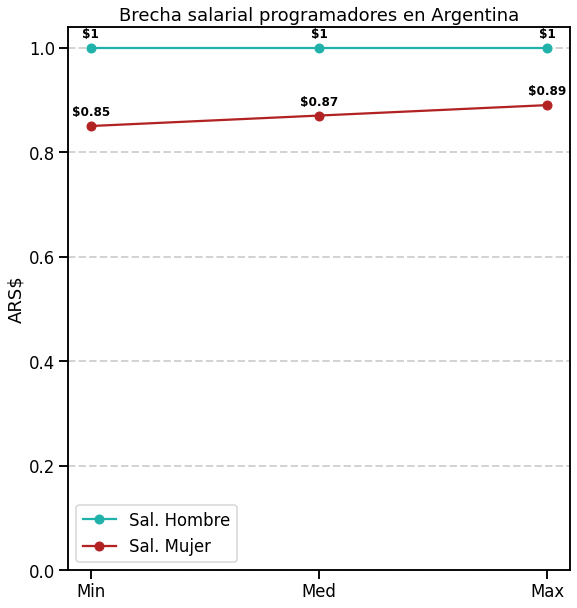

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,10))
fig.patch.set_facecolor('white')
rango = ['Min', 'Med', 'Max']
salarios = {'Hombre':[1, 1, 1], 'Mujer':[min_b_a, med_b_a, max_b_a]}
ax.plot(rango, salarios['Hombre'], marker = 'o', label="Sal. Hombre", color ='lightseagreen')
ax.plot(rango, salarios['Mujer'], marker = 'o', label="Sal. Mujer",color='firebrick')

ax.set_title('Brecha salarial programadores en Argentina')
ax.legend()
#plt.xlabel("Rango")
plt.ylabel("ARS$")
plt.grid(axis= 'y',color='lightgrey', linestyle='--', linewidth=2)
for i in range(len(rango)):
  ax.text(rango[i],salarios['Hombre'][i]+0.02, f"${salarios['Hombre'][i]}", fontsize =12, horizontalalignment = 'center', fontweight='demibold')
  ax.text(rango[i],salarios['Mujer'][i]+0.02, f"${salarios['Mujer'][i]}", fontsize =12, horizontalalignment = 'center', fontweight='demibold')

plt.ylim(min_b_a-0.85,1.04)
plt.show()